In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from IPython.core.pylabtools import figsize

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_all = pd.read_csv('../Processed Data/AllPlayerDataProcessed.csv').drop(columns=['Index'])
df_gk = pd.read_csv('../Processed Data/GKDataProcessed.csv').drop(columns=['Index'])
df_bk = pd.read_csv('../Processed Data/BKDataProcessed.csv').drop(columns=['Index'])
df_md = pd.read_csv('../Processed Data/MDDataProcessed.csv').drop(columns=['Index'])
df_fwd = pd.read_csv('../Processed Data/FWDDataProcessed.csv').drop(columns=['Index'])
# df = df_all
# df.head()

In [3]:
# Training the linear regression model for midfielders
# Splitting data into attribute and target value, and then split them into training and testing sets
target = df_all.Overall
df_all = df_all.drop(['Overall'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_all, target, test_size=0.2)


In [4]:
# Function to calculate mean absolute error
def mse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

def r2score(y_true, y_pred):
    return r2_score(y_test, y_pred)

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mse(y_test, model_pred)
    model_r2score = r2_score(y_test, model_pred)
    # Return the performance metric
    return model_mae , model_r2score

In [5]:
lr = LinearRegression()
lr_mse, lr_r2score = fit_and_evaluate(lr)

# Model performance
print('r2 score: '+str(lr_r2score))
print('RMSE : '+str(lr_mse))

r2 score: 0.8621804880209354
RMSE : 2.5608775876668046


In [6]:
random_forest = RandomForestRegressor()
random_forest_mse, random_forest_r2score = fit_and_evaluate(random_forest)

# Model performance
print('r2 score: '+str(random_forest_r2score))
print('RMSE : '+str(random_forest_mse))

r2 score: 0.9560981935631031
RMSE : 1.4453554378068378


In [8]:
gradient_boosted = GradientBoostingRegressor()
gradient_boosted_mse, gradient_boosted_r2score  = fit_and_evaluate(gradient_boosted)

# Model performance
print('r2 score: '+str(gradient_boosted_r2score))
print('RMSE : '+str(gradient_boosted_mse))

r2 score: 0.9506293133911297
RMSE : 1.5327384386639342


In [9]:
knn = KNeighborsRegressor()
knn_mse, knn_r2score = fit_and_evaluate(knn)

# Model performance
print('r2 score: '+str(knn_r2score))
print('RMSE : '+str(knn_mse))

r2 score: 0.9351922020374881
RMSE : 1.7560913271556506


In [10]:
# From Prediction_Neutral_Network_2.0
nn_mse = 0.79621696
nn_r2score = 0.9873308339334138

Text(0.5, 1.0, 'Model Comparison on r2score')

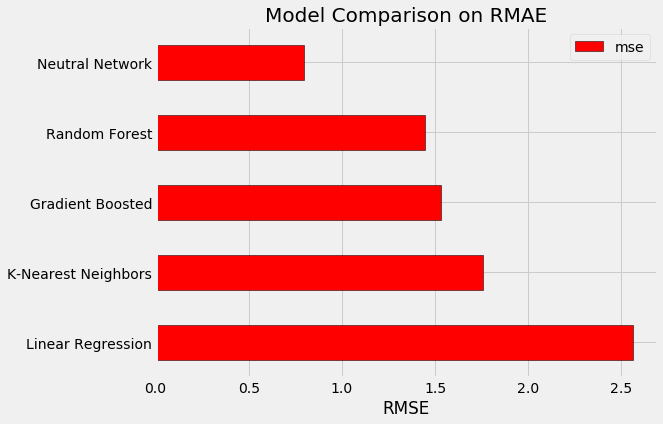

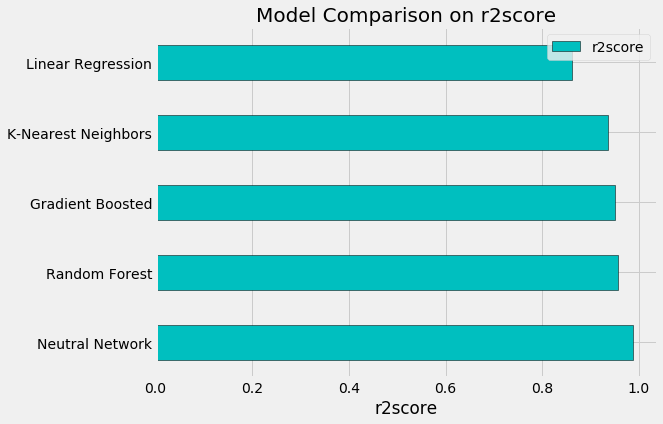

In [16]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Random Forest', 'Gradient Boosted', 'K-Nearest Neighbors', 'Neutral Network'],
                                 'mse': [lr_mse, random_forest_mse, 
                                         gradient_boosted_mse, knn_mse, nn_mse],
                                 'r2score':[lr_r2score, random_forest_r2score, 
                                            gradient_boosted_r2score, knn_r2score, nn_r2score ]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mse', ascending = False).plot(x = 'model', y = 'mse', kind = 'barh',
                                                           color = 'r', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('RMSE'); plt.xticks(size = 14)
plt.title('Model Comparison on RMAE', size = 20)

# Horizontal bar chart of test mae
model_comparison.sort_values('r2score', ascending = False).plot(x = 'model', y = 'r2score', kind = 'barh',
                                                           color = 'c', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('r2score'); plt.xticks(size = 14)
plt.title('Model Comparison on r2score', size = 20)